Họ tên: Lê Quang Vũ

MSSV: 1712209

# BT02: Cách thực thi song song trong CUDA

Bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell đề mục của mình là được.

## Câu 1A

In [18]:
!nvcc bt02_p1.cu -o bt02_p1

In [23]:
!./bt02_p1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15812263936 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.869184 ms, post-kernel time = 0.050976 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.886560 ms, post-kernel time = 0.056544 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 1.816608 ms, post-kernel time = 0.059104 ms
CORRECT :)


## Kết quả chạy với kích thước block mặc định (512):

- Kernel 1: 1.868512 ms
- Kernel 2: 1.885792 ms
- Kernel 3: 1.817184 ms

## Nhận xét

- Kernel 1 nhanh hơn kernel 2 (trong tất cả các lần chạy) không biết tại sao. Nhưng khi chỉnh blockSize xuống 256 thì kernel 2 lại nhanh hơn.

- Kernel 3 nhanh hơn kernel 1 và 2 vì vừa tối ưu được warp vừa tối ưu được cache


## Câu 1B


In [24]:
!./bt02_p1 1024

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15812263936 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.541472 ms, post-kernel time = 0.028480 ms
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 2.575936 ms, post-kernel time = 0.029600 ms
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 2.421568 ms, post-kernel time = 0.030016 ms
CORRECT :)


In [25]:
!./bt02_p1 512

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15812263936 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.871328 ms, post-kernel time = 0.048704 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.886176 ms, post-kernel time = 0.049312 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 1.816032 ms, post-kernel time = 0.048864 ms
CORRECT :)


In [26]:
!./bt02_p1 256

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15812263936 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 256
Kernel time = 1.534848 ms, post-kernel time = 0.091872 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 1.526816 ms, post-kernel time = 0.107680 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 1.476768 ms, post-kernel time = 0.092416 ms
CORRECT :)


In [27]:
!./bt02_p1 128

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15812263936 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 128
Kernel time = 1.327552 ms, post-kernel time = 0.167936 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 1.305952 ms, post-kernel time = 0.179520 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 1.262304 ms, post-kernel time = 0.165120 ms
CORRECT :)


Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 1 | 100 | 2.541472 | 0.028480 | 2.569952
512 | 16385 | 2 | 100 | 1.871328 | 0.048704 | 1.920032
256 | 32769 | 4 | 100 | 1.534848 | 0.091872 | 1.62672
128 | 65537 | 8 | 100 | 1.327552 | 0.167936 | 1.495488

- Khi giảm block size kernel time giảm vì ta sử dụng SMs hiệu quả hơn
- Post kernel time tăng vì mảng out dài hơn, CPU cần làm việc nhiều hơn

## Câu 2

In [26]:
!nvcc bt02_p2.cu -o bt02_p2

In [29]:
!nvprof -o p2_1s.nvvp -f ./bt02_p2

n =  16777217

==546== NVPROF is profiling process 546, command: ./bt02_p2
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 17.228640 ms

CORRECT :)
==546== Generated result file: /content/p2_1s.nvvp


In [30]:
!nvprof -o p2_3s.nvvp -f ./bt02_p2 512 3

n =  16777217

==559== NVPROF is profiling process 559, command: ./bt02_p2 512 3
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 13.939296 ms

CORRECT :)
==559== Generated result file: /content/p2_3s.nvvp


## 1 Stream

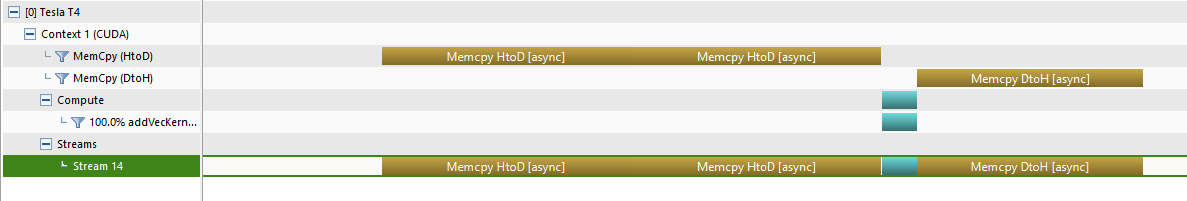

## 3 stream

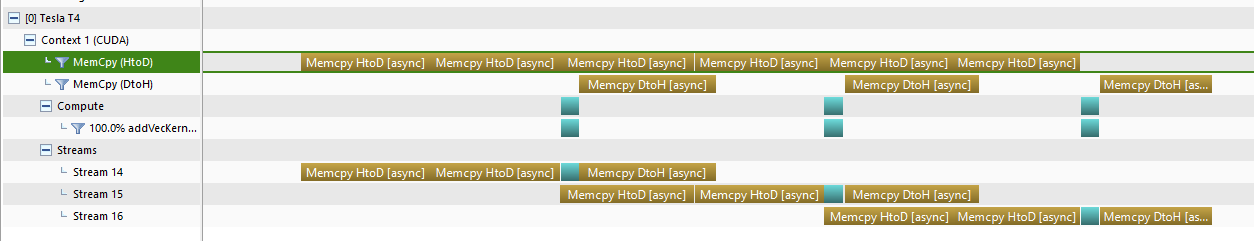